In [1]:
import numpy as np 
import pandas as pd 
import requests 
import regex 

# Image Downloading

In [37]:
df = pd.read_csv('withSentiment.csv')
df.head()

,Unnamed: 0,id,indexed_date,language,media_name,media_url,publish_date,title_x,url,error,...,text,top_image,images,num_images,cleaned_text,TopicId,Topic_name,sentiment_score,sentiment_variance,sentiment_label
0,0,19d73b7cd0a23f961ea3aae6d1554c62b004aac1a4a6c7...,2025-12-24 05:22:29.307373+00:00,en,sandiegouniontribune.com,sandiegouniontribune.com,2025-12-23,UC San Diego eyes campuswide AI coordinating s...,https://www.sandiegouniontribune.com/2025/12/2...,NaN,...,As institutions across the world establish app...,https://www.sandiegouniontribune.com/wp-conten...,['https://www.sandiegouniontribune.com/wp-cont...,6.0,as institutions across the world establish app...,-1.0,-1_ai_said_data_like,0.777960,0.388300,POSITIVE
1,1,5dc81d658b56b2424da775f9d2496810172b4e7e907305...,2025-12-24 03:21:38.495827+00:00,en,theweek.com,theweek.com,2025-12-23,Trump vs. states: Who gets to regulate AI?,https://theweek.com/politics/trump-states-regu...,NaN,...,Should technology that’s going to determine Am...,https://cdn.mos.cms.futurecdn.net/FhdL3tZb3YpM...,['https://cdn.mos.cms.futurecdn.net/STkhkAgPdN...,18.0,should technology that s going to determine am...,-1.0,-1_ai_said_data_like,-0.325636,0.870922,NEGATIVE
2,2,8424d86c8fb3e91c1ba6ac73b2a9c92fae17bf36871802...,2025-12-24 00:29:59.301749+00:00,en,benzinga.com,benzinga.com,2025-12-23,AI Pioneer Yoshua Bengio Reveals He Misleads C...,https://www.benzinga.com/markets/tech/25/12/49...,NaN,...,"Yoshua Bengio, one of the pioneers of artifici...",https://cdn.benzinga.com/files/images/story/20...,['https://www.benzinga.com/_next/image?url=%2F...,10.0,yoshua bengio one of the pioneers of artificia...,-1.0,-1_ai_said_data_like,-0.194122,0.868039,NEGATIVE
3,3,ee34202162eff5335539b80f463a1b20b5f73173155656...,2025-12-24 00:22:34.618199+00:00,en,benzinga.com,benzinga.com,2025-12-23,From Discoverative AI to the Entropy of Tolera...,https://www.benzinga.com/pressreleases/25/12/n...,NaN,...,"SAN MATEO, Calif. , Dec. 23, 2025 /PRNewswire/...",https://www.benzinga.com/next-assets/images/be...,['https://edge.prnewswire.com/c/img/favicon.pn...,14.0,san mateo calif dec prnewswire shanda group ha...,-1.0,-1_ai_said_data_like,0.805941,0.342142,POSITIVE
4,4,df68b6f39f396d32a2f81a00f381bc30eeb07f72186d82...,2025-12-24 00:19:46.702100+00:00,en,ign.com,ign.com,2025-12-23,"Eddy Burback Made The First Great Horror ""Movi...",https://www.ign.com/videos/eddy-burback-made-t...,NaN,...,0:23\n\n28 Years Later Star Wants to Be in a D...,https://assets-prd.ignimgs.com/2025/12/20/eddy...,['https://assets-prd.ignimgs.com/2025/12/20/ed...,2.0,years later star wants to be in a dead space m...,-1.0,-1_ai_said_data_like,-0.999044,0.000000,NEGATIVE


In [3]:
import os
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed

In [38]:
df['images'].info()

<class 'pandas.Series'>
RangeIndex: 8999 entries, 0 to 8998
Series name: images
Non-Null Count  Dtype
--------------  -----
7510 non-null   str  
dtypes: str(1)
memory usage: 70.4 KB


In [12]:
import ast

In [39]:
df['images'].isna().sum()

np.int64(1489)

In [40]:
df['images'] = df['images'].fillna(value="[]")

In [41]:
df['images'].isna().sum()

np.int64(0)

In [42]:
df['image_list'] = df['images'].apply(ast.literal_eval)

In [43]:
df['image_list'].info()

<class 'pandas.Series'>
RangeIndex: 8999 entries, 0 to 8998
Series name: image_list
Non-Null Count  Dtype 
--------------  ----- 
8999 non-null   object
dtypes: object(1)
memory usage: 70.4+ KB


In [44]:
(~df['image_list'].astype(bool)).sum()

np.int64(1489)

In [77]:
def remove_logos(url_list):
    logo = ['.png','.svg', 'logo']
    return [url for url in url_list if not any(l in url for l in logo)]

In [78]:
df['image_list'] = df['image_list'].apply(remove_logos)

In [79]:
df['image_list'].info()

<class 'pandas.Series'>
RangeIndex: 8999 entries, 0 to 8998
Series name: image_list
Non-Null Count  Dtype 
--------------  ----- 
8999 non-null   object
dtypes: object(1)
memory usage: 70.4+ KB


In [107]:
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36",
    "Accept": "image/*,*/*;q=0.8",
}

def download_image(task, output_dir="images"):
    article_id, idx, url = task
    try:
        if url.startswith("data:image"):
            return article_id, url, "skipped_base64"
        
        r = requests.get(url, headers=HEADERS, timeout=10)
        r.raise_for_status()

        content_type = r.headers.get("Content-Type", "")
        if not content_type.startswith("image/"):
            return f"Skipped (not image): {url} [{content_type}]"

        ext = content_type.split("/")[-1].split(";")[0]

        path_name = f"{article_id}_{idx}"
        path = os.path.join(output_dir, f"img_{path_name}.{ext}")

        with open(path, "wb") as f:
            f.write(r.content)

        return article_id, url, "downloaded"

    except requests.exceptions.RequestException as e:
        return article_id, url, f"failed ({e.__class__.__name__})" 

def download_images_parallel(urls, workers=8):
    results = []
    with ThreadPoolExecutor(max_workers=workers) as executor:
        futures = [
            executor.submit(download_image, task) for task in urls
        ]

        for future in as_completed(futures):
            results.append(future.result())
    return results 


In [83]:
image_url_dict = dict(zip(df['id'], df['image_list']))

In [85]:
tasks = []
for article_id, urls in image_url_dict.items():
    for idx, url in enumerate(urls):
        tasks.append((article_id, idx, url))

In [108]:
len(tasks)

65587

In [109]:
results = download_images_parallel(tasks)

In [110]:
len(results)

65587

# Image labeling 

In [2]:
import os
image_dir = "images"
extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".webp", ".tiff")

image_files = [
    f for f in os.listdir(image_dir)
    if f.lower().endswith(extensions)
]
images_df = pd.DataFrame({"image_title": image_files})

In [3]:
images_df.shape

(61033, 1)

In [4]:
images_df.head()

,image_title
0,img_5431af9f4623c883e4ee896d8378219cd432415589...
1,img_ca81989c15a9b994923c1b0c049fff95181460cb16...
2,img_d6ad5b750a277ff32922495802cbae30ac8cfbc3fa...
3,img_da89728170cb87dfb3a1f929dda9f18e9eece1cf8d...
4,img_a507cadbf654569718031793f6667e76b23ae9884d...


In [5]:
images_df[images_df['image_title'].str.contains('png')].shape

(579, 1)

In [6]:
images_df[images_df['image_title'].str.contains('logo')].shape

(0, 1)

In [7]:
images_df['is_logo'] = images_df['image_title'].apply(lambda x: True if 'png' in x else False)

In [8]:
images_df['is_logo'].value_counts()

is_logo
False    60454
True       579
Name: count, dtype: int64

In [9]:
images_df.head()

,image_title,is_logo
0,img_5431af9f4623c883e4ee896d8378219cd432415589...,False
1,img_ca81989c15a9b994923c1b0c049fff95181460cb16...,False
2,img_d6ad5b750a277ff32922495802cbae30ac8cfbc3fa...,False
3,img_da89728170cb87dfb3a1f929dda9f18e9eece1cf8d...,False
4,img_a507cadbf654569718031793f6667e76b23ae9884d...,False


In [10]:
articles_df = pd.read_csv('withSentiment.csv')
articles_df.head()

,Unnamed: 0,id,indexed_date,language,media_name,media_url,publish_date,title_x,url,error,...,text,top_image,images,num_images,cleaned_text,TopicId,Topic_name,sentiment_score,sentiment_variance,sentiment_label
0,0,19d73b7cd0a23f961ea3aae6d1554c62b004aac1a4a6c7...,2025-12-24 05:22:29.307373+00:00,en,sandiegouniontribune.com,sandiegouniontribune.com,2025-12-23,UC San Diego eyes campuswide AI coordinating s...,https://www.sandiegouniontribune.com/2025/12/2...,NaN,...,As institutions across the world establish app...,https://www.sandiegouniontribune.com/wp-conten...,['https://www.sandiegouniontribune.com/wp-cont...,6.0,as institutions across the world establish app...,-1.0,-1_ai_said_data_like,0.777960,0.388300,POSITIVE
1,1,5dc81d658b56b2424da775f9d2496810172b4e7e907305...,2025-12-24 03:21:38.495827+00:00,en,theweek.com,theweek.com,2025-12-23,Trump vs. states: Who gets to regulate AI?,https://theweek.com/politics/trump-states-regu...,NaN,...,Should technology that’s going to determine Am...,https://cdn.mos.cms.futurecdn.net/FhdL3tZb3YpM...,['https://cdn.mos.cms.futurecdn.net/STkhkAgPdN...,18.0,should technology that s going to determine am...,-1.0,-1_ai_said_data_like,-0.325636,0.870922,NEGATIVE
2,2,8424d86c8fb3e91c1ba6ac73b2a9c92fae17bf36871802...,2025-12-24 00:29:59.301749+00:00,en,benzinga.com,benzinga.com,2025-12-23,AI Pioneer Yoshua Bengio Reveals He Misleads C...,https://www.benzinga.com/markets/tech/25/12/49...,NaN,...,"Yoshua Bengio, one of the pioneers of artifici...",https://cdn.benzinga.com/files/images/story/20...,['https://www.benzinga.com/_next/image?url=%2F...,10.0,yoshua bengio one of the pioneers of artificia...,-1.0,-1_ai_said_data_like,-0.194122,0.868039,NEGATIVE
3,3,ee34202162eff5335539b80f463a1b20b5f73173155656...,2025-12-24 00:22:34.618199+00:00,en,benzinga.com,benzinga.com,2025-12-23,From Discoverative AI to the Entropy of Tolera...,https://www.benzinga.com/pressreleases/25/12/n...,NaN,...,"SAN MATEO, Calif. , Dec. 23, 2025 /PRNewswire/...",https://www.benzinga.com/next-assets/images/be...,['https://edge.prnewswire.com/c/img/favicon.pn...,14.0,san mateo calif dec prnewswire shanda group ha...,-1.0,-1_ai_said_data_like,0.805941,0.342142,POSITIVE
4,4,df68b6f39f396d32a2f81a00f381bc30eeb07f72186d82...,2025-12-24 00:19:46.702100+00:00,en,ign.com,ign.com,2025-12-23,"Eddy Burback Made The First Great Horror ""Movi...",https://www.ign.com/videos/eddy-burback-made-t...,NaN,...,0:23\n\n28 Years Later Star Wants to Be in a D...,https://assets-prd.ignimgs.com/2025/12/20/eddy...,['https://assets-prd.ignimgs.com/2025/12/20/ed...,2.0,years later star wants to be in a dead space m...,-1.0,-1_ai_said_data_like,-0.999044,0.000000,NEGATIVE


In [11]:
article_ids = articles_df['id']

In [12]:
import re

In [13]:
def get_id(text):
    return re.search("_(.*?)_", text).group(1)

In [14]:
images_df['id'] = images_df['image_title'].apply(get_id)

In [15]:
images_df.head()

,image_title,is_logo,id
0,img_5431af9f4623c883e4ee896d8378219cd432415589...,False,5431af9f4623c883e4ee896d8378219cd4324155898bbf...
1,img_ca81989c15a9b994923c1b0c049fff95181460cb16...,False,ca81989c15a9b994923c1b0c049fff95181460cb16f0ea...
2,img_d6ad5b750a277ff32922495802cbae30ac8cfbc3fa...,False,d6ad5b750a277ff32922495802cbae30ac8cfbc3faf3d1...
3,img_da89728170cb87dfb3a1f929dda9f18e9eece1cf8d...,False,da89728170cb87dfb3a1f929dda9f18e9eece1cf8d4b06...
4,img_a507cadbf654569718031793f6667e76b23ae9884d...,False,a507cadbf654569718031793f6667e76b23ae9884d5f04...


In [16]:
images_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 61033 entries, 0 to 61032
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   image_title  61033 non-null  str  
 1   is_logo      61033 non-null  bool 
 2   id           61033 non-null  str  
dtypes: bool(1), str(2)
memory usage: 1013.4 KB


In [17]:
images_df[images_df['id'] == " "].sum()

image_title    0.0
is_logo        0.0
id             0.0
dtype: float64

In [18]:
images_df = pd.merge(images_df, articles_df[['id','Topic_name']], on=['id'], how='left')

In [19]:
images_df.head()

,image_title,is_logo,id,Topic_name
0,img_5431af9f4623c883e4ee896d8378219cd432415589...,False,5431af9f4623c883e4ee896d8378219cd4324155898bbf...,12_school_law_legal_court
1,img_ca81989c15a9b994923c1b0c049fff95181460cb16...,False,ca81989c15a9b994923c1b0c049fff95181460cb16f0ea...,24_china_chips_nvidia_trump
2,img_d6ad5b750a277ff32922495802cbae30ac8cfbc3fa...,False,d6ad5b750a277ff32922495802cbae30ac8cfbc3faf3d1...,14_apple_glasses_iphone_google
3,img_da89728170cb87dfb3a1f929dda9f18e9eece1cf8d...,False,da89728170cb87dfb3a1f929dda9f18e9eece1cf8d4b06...,-1_ai_said_data_like
4,img_a507cadbf654569718031793f6667e76b23ae9884d...,False,a507cadbf654569718031793f6667e76b23ae9884d5f04...,-1_ai_said_data_like


In [20]:
def get_sample_topics(df, topic_column, title_col):
    topic_counts = df[topic_column].value_counts()
    valid_topics = topic_counts[(topic_counts >= 20) & (~topic_counts.index.str.contains('-1'))].index
    size = round(500/len(valid_topics))
    final_df = pd.DataFrame()
    VALID_EXTENSIONS = {".jpg", ".jpeg", ".png", ".webp"}
    for topic in valid_topics:
        temp = df[df[topic_column] == topic]
        temp = temp[temp[title_col].str.lower().str.endswith(tuple(VALID_EXTENSIONS))]
        temp = temp[title_col].sample(size)
        temp = temp.to_frame()
        final_df = pd.concat([final_df, temp], ignore_index=True)
    return final_df

In [21]:
sample_topics = get_sample_topics(images_df, 'Topic_name', 'image_title')

In [22]:
sample_topics.shape

(506, 1)

In [23]:
sample_topics.head()

,image_title
0,img_e24588e92bc5ff68c071bd78f9fe406030db2cfdca...
1,img_aa5becf46d55569ce75be4b8d64b8edcda0f85bcec...
2,img_658aef4ae8bbd41e9e2dfb788a3eb403fb78c62b29...
3,img_0224f7ab3a97e49294fc4a3e0611715a96e94ae2b9...
4,img_d47e1364054e332e096bb034ab549f34da549b6c17...


In [24]:
sample_topics[sample_topics['image_title'].str.contains(".gif")]

,image_title


In [25]:
image_paths = sample_topics['image_title'].tolist()
len(image_paths)

506

In [26]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import torch
from tqdm import tqdm 
from bertopic import BERTopic
from bertopic.backend import MultiModalBackend
from bertopic.representation import KeyBERTInspired


In [35]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [36]:
device

device(type='mps')

In [37]:
model_name = "Salesforce/blip2-opt-2.7b"
process = Blip2Processor.from_pretrained(model_name)
model = Blip2ForConditionalGeneration.from_pretrained(model_name, torch_dtype=torch.float32)
model.to(device).eval()

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/1247 [00:00<?, ?it/s]

RuntimeError: MPS backend out of memory (MPS allocated: 20.12 GiB, other allocations: 464.00 KiB, max allowed: 20.13 GiB). Tried to allocate 22.69 MiB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [31]:
from concurrent.futures import ThreadPoolExecutor
import queue 
import threading 

In [33]:
def caption_batch(paths, prompt):
    images, valid = [], []
    for p in paths:
        try:
            img_path = f'images/{p}'
            img = Image.open(img_path)
            # img = img.convert("RGB")
            images.append(img)
            valid.append(img_path)
        except Exception as e:
            print(f"Skipping image: {p} for {type(e).__name__}")
    if not images:
        return [], []
    try:
        inputs = process(
            images=images,
            text=[prompt]*len(images),
            return_tensors="pt",
            padding=True
        ).to(device)

    except Exception as e:
        print(f"Processor failed on batch {valid}: {e}")
        return [], []
    
    with torch.no_grad():
        generated_ids = model.generate(
            **inputs,
            max_new_tokens=80,
            num_beams=4
        )
    captions = process.batch_decode(generated_ids, skip_special_tokens=True)
    torch.mps.empty_cache()
    return [c.strip() for c in captions], valid
        

In [31]:
batch_size = 4   
prompt = "Describe what is literally shown in this image:"

In [ ]:
all_captions, all_paths = [], []
for i in tqdm(range(0, len(image_paths), batch_size), desc="Captioning"):
    batch = image_paths[i: i+ batch_size]
    captions, valid_paths = caption_batch(batch, prompt)
    all_captions.extend(captions)
    all_paths.extend(valid_paths)
print(f"Captioned {len(all_captions)} images")

Captioning:   0%|          | 0/127 [00:00<?, ?it/s]

In [1]:
len(all_captions)

NameError: name 'all_captions' is not defined

In [157]:
image_paths[9]

'img_1b11a4c876ab31b54ac7ea6d65bf42a6415c1818f3db9ebf2be4e937f8f87efa_16.jpeg'

In [120]:
all_paths

[]

In [147]:
from collections import Counter

modes = Counter()
problematic = []

for path in tqdm(image_paths, desc="Auditing"):
    try:
        img_path = f"images/{path}"
        img = Image.open(img_path)
        modes[img.mode] += 1
    except Exception as e:
        problematic.append((img_path, str(e)))

print("Image modes found:", modes)
print(f"Unreadable files: {len(problematic)}")
for p, e in problematic[:10]:
    print(f"  {p}: {e}")

Auditing: 100%|██████████| 506/506 [00:00<00:00, 3433.05it/s]

Image modes found: Counter({'RGB': 476, 'RGBA': 24, 'L': 4, 'P': 2})
Unreadable files: 0


In [150]:
# ── Diagnostic: find all problematic images ───────────────────────────
problematic = []
mode_counts = {}

for path in tqdm(image_paths, desc="Diagnosing"):
    path = f"images/{path}"
    try:
        img = Image.open(path)
        img.load()
        mode_counts[img.mode] = mode_counts.get(img.mode, 0) + 1
    except Exception as e:
        problematic.append((path, str(e)))

print("\nImage modes found:")
for mode, count in sorted(mode_counts.items()):
    print(f"  {mode}: {count}")

print(f"\nProblematic images: {len(problematic)}")
for p, e in problematic[:20]:
    print(f"  {os.path.basename(p)}: {e}")

Diagnosing: 100%|██████████| 506/506 [00:02<00:00, 227.39it/s]


Image modes found:
  L: 4
  P: 2
  RGB: 476
  RGBA: 24

Problematic images: 0


In [ ]:
images = []
for img in image_paths:
    img = Image.open(f'images/{img}')
    img = img.convert("RGB")
    arr = np.array(img)
    arr = arr.astype(dtype=np.uint8)
    
    images.append(arr.dtype)

/Users/tanayapravinjoshi/Projects/MultimodalResearchProject/venv/lib/python3.13/site-packages/PIL/Image.py:1034: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



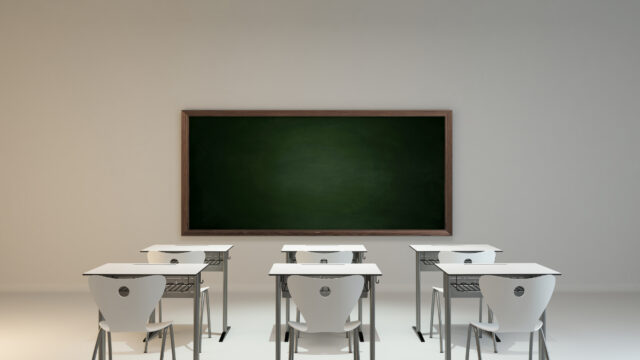

In [185]:
img = Image.open(f'images/{image_paths[30]}')
img = img.convert("RGB")
arr = np.array(img)
arr = arr.astype(dtype=np.uint8)
Image.fromarray(arr, mode="RGB")

In [173]:
for img in images:
    if str(img) != "uint8":
        print(img)